In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.117242781408677 -136.1858301935816
-60.39895343005588 -169.31963216927375
-11.656470268302144 85.9242927460457
53.30743651930436 35.74802648459598
-32.926480967927944 109.39627265689688
30.93400761414553 126.80599945666512
-63.99586948925885 84.5228382437794
-36.0975920770376 -20.848524870453986
-43.634817448035804 20.015409779767595
18.247002718321326 -38.7780820473381
-34.9706875820167 164.01656032691272
65.66914983088776 -166.3684844316943
40.23934814922805 91.18656884239664
58.99146118725406 -43.510705450173816
-58.274817924073076 123.55169536214186
-25.386519940633676 109.66684664730326
-41.88714845398693 -120.51975083084932
-88.5861894236835 -85.54835794364341
-24.86571301258148 18.402056925856954
13.26011781038332 68.29789600227349
-89.6112325547538 73.97659190702697
-6.037575323054213 42.12122086410716
-33.70690853872284 149.76572695165322
-73.53782042177883 28.866560710096337
-50.343443471974254 133.16591607904553
-1.7968980662271576 -84.00373036164544
27.49312826336994 72.

In [5]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [6]:
# ADDED Identify the nearest city for each latitude and longitude combination.
# Create a list for holding the cities.
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2ec8678b701eaaa35d231899810ef1b


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | znamenskoye
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | fukue
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | hami
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mariental
Processing Record 19 of Set 1 | kavaratti
Processing Record 20 of Set 1 | chake chake
Processing Record 21 of Set 1 | lithgow
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 of Set 1 | mount gambier
Processing Record 24 of Set 1 | salinas
Proc

Processing Record 36 of Set 4 | ossora
Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | cabo rojo
Processing Record 39 of Set 4 | yambio
Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | roebourne
Processing Record 43 of Set 4 | sudbury
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | nova vicosa
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | tonantins
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | nicoya
Processing Record 2 of Set 5 | warrnambool
Processing Record 3 of Set 5 | atambua
Processing Record 4 of Set 5 | payakumbuh
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | greenville
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | shubarkuduk
Processing Record 9 of Set 5 | hamilton
Processing Record 10 

Processing Record 27 of Set 8 | praia
Processing Record 28 of Set 8 | isangel
Processing Record 29 of Set 8 | vilhena
Processing Record 30 of Set 8 | tiznit
Processing Record 31 of Set 8 | rio grande
Processing Record 32 of Set 8 | bama
Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | nouadhibou
Processing Record 35 of Set 8 | broome
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | wahran
City not found. Skipping...
Processing Record 38 of Set 8 | samarai
Processing Record 39 of Set 8 | buala
Processing Record 40 of Set 8 | manoel urbano
Processing Record 41 of Set 8 | longyearbyen
Processing Record 42 of Set 8 | emerald
Processing Record 43 of Set 8 | tual
Processing Record 44 of Set 8 | katiola
Processing Record 45 of Set 8 | piranshahr
Processing Record 46 of Set 8 | fairbanks
Processing Record 47 of Set 8 | pisco
Processing Record 48 of Set 8 | visby
Processing Record 49 of Set 8 | mayor pablo lagerenza
Processing Record 50 of Se

Processing Record 21 of Set 12 | trinidad
Processing Record 22 of Set 12 | njombe
Processing Record 23 of Set 12 | kismayo
Processing Record 24 of Set 12 | quatre cocos
Processing Record 25 of Set 12 | capreol
Processing Record 26 of Set 12 | umm kaddadah
Processing Record 27 of Set 12 | muroto
Processing Record 28 of Set 12 | osorno
Processing Record 29 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 30 of Set 12 | lengshuitan
Processing Record 31 of Set 12 | wanaka
Processing Record 32 of Set 12 | road town
Processing Record 33 of Set 12 | portree
Processing Record 34 of Set 12 | astoria
Processing Record 35 of Set 12 | geraldton
Processing Record 36 of Set 12 | turan
Processing Record 37 of Set 12 | os
City not found. Skipping...
Processing Record 38 of Set 12 | mendoza
Processing Record 39 of Set 12 | tieli
Processing Record 40 of Set 12 | southbridge
Processing Record 41 of Set 12 | khash
Processing Record 42 of Set 12 | thio
Processing Record 43 of Set 12 |

In [11]:
len(city_data)

578

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacific Grove,36.6177,-121.9166,42.91,88,0,5.75,US,2023-01-18 15:31:11
1,Vaini,-21.2000,-175.2000,71.76,100,20,0.00,TO,2023-01-18 15:31:11
2,Hithadhoo,-0.6000,73.0833,81.79,69,11,9.01,MV,2023-01-18 15:31:12
3,Znamenskoye,57.1281,73.8282,16.43,89,100,7.74,RU,2023-01-18 15:31:12
4,Busselton,-33.6500,115.3333,63.59,59,35,18.07,AU,2023-01-18 15:30:52
5,Fukue,32.6881,128.8419,47.14,61,100,15.32,JP,2023-01-18 15:31:13
6,Sao Joao Da Barra,-21.6403,-41.0511,86.09,82,15,12.26,BR,2023-01-18 15:31:14
7,Bredasdorp,-34.5322,20.0403,79.99,56,69,18.48,ZA,2023-01-18 15:28:13
8,Ponta Do Sol,32.6667,-17.1000,63.12,58,23,6.51,PT,2023-01-18 15:30:27
9,Ahipara,-35.1667,173.1667,62.58,91,10,8.10,NZ,2023-01-18 15:31:15


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

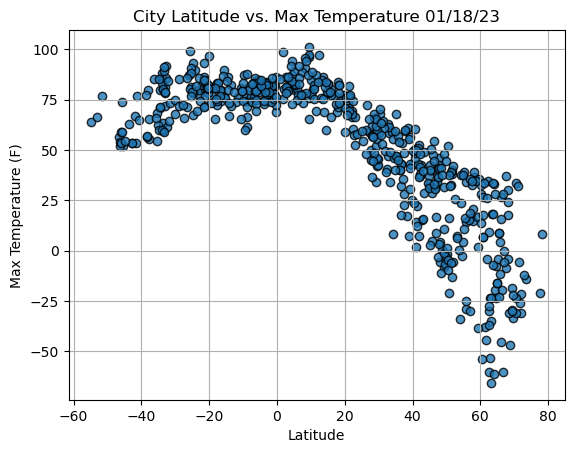

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

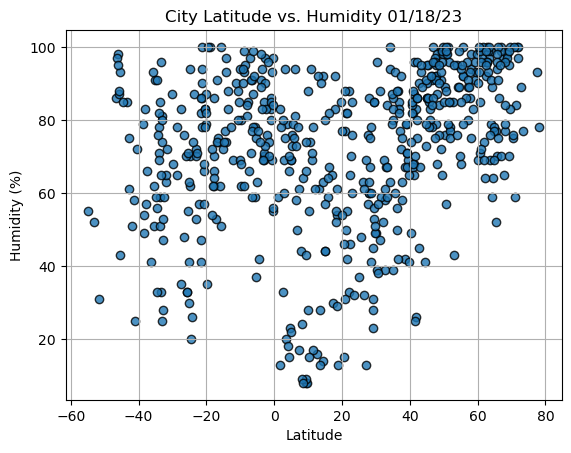

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

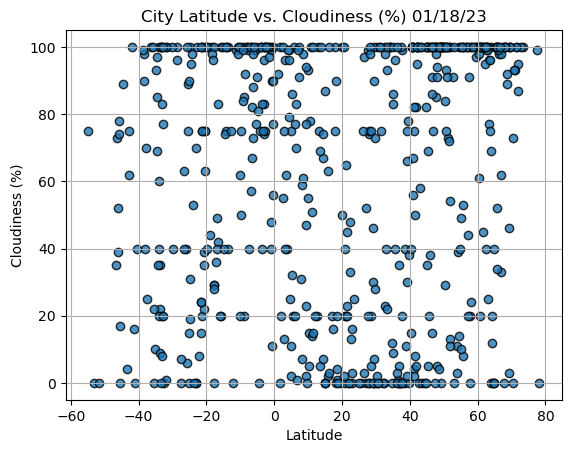

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

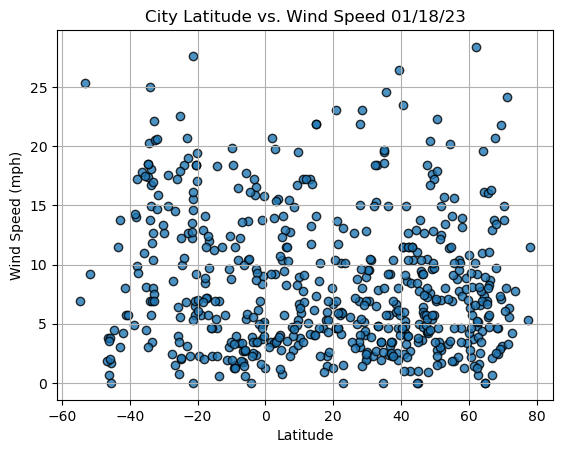

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
#show

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2023-01-18 15:30:02
Lat                       42.6001
Lng                      -73.9662
Max Temp                    42.67
Humidity                       90
Cloudiness                    100
Wind Speed                   1.01
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
573     True
574    False
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2023-01-18 15:31:11,36.6177,-121.9166,42.91,88,0,5.75
3,Znamenskoye,RU,2023-01-18 15:31:12,57.1281,73.8282,16.43,89,100,7.74
5,Fukue,JP,2023-01-18 15:31:13,32.6881,128.8419,47.14,61,100,15.32
8,Ponta Do Sol,PT,2023-01-18 15:30:27,32.6667,-17.1000,63.12,58,23,6.51
10,Nome,US,2023-01-18 15:29:40,64.5011,-165.4064,-7.53,64,0,16.11


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

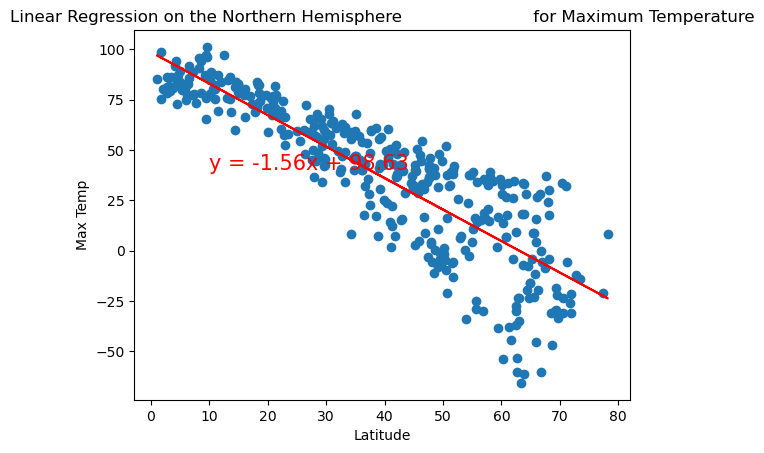

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

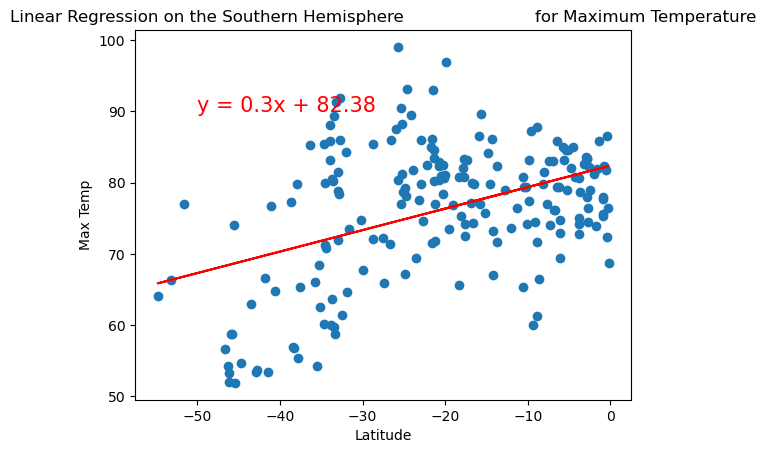

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

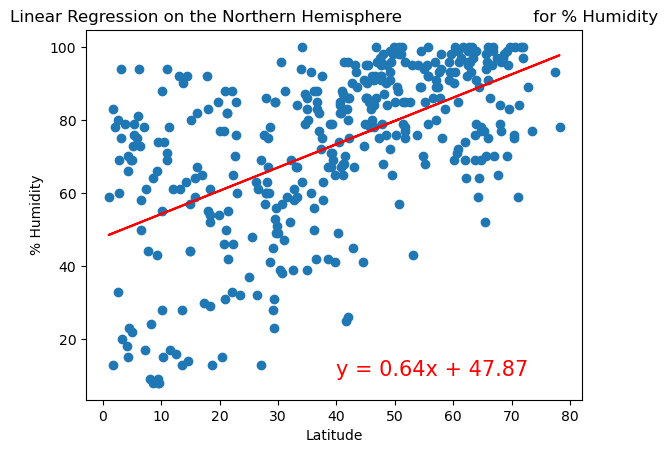

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

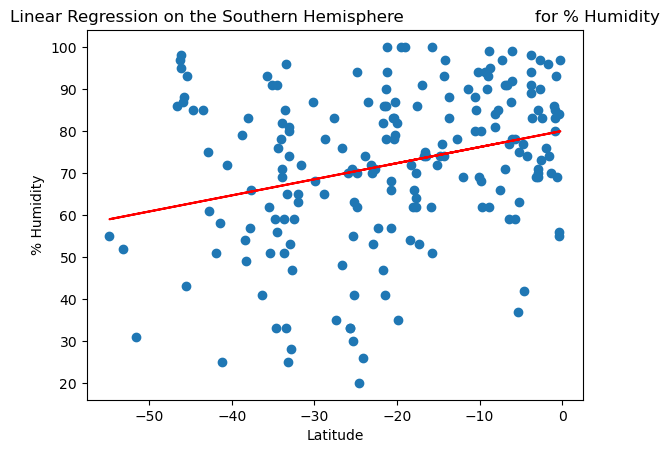

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

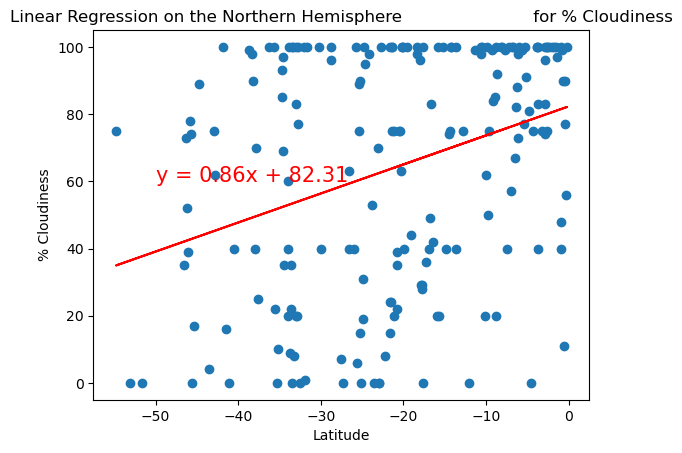

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

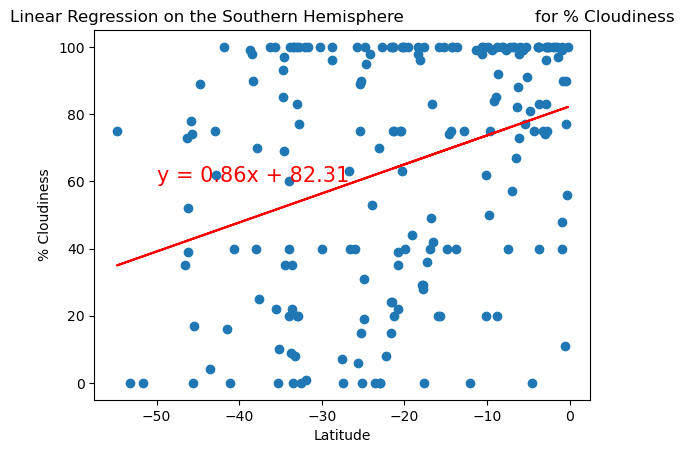

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

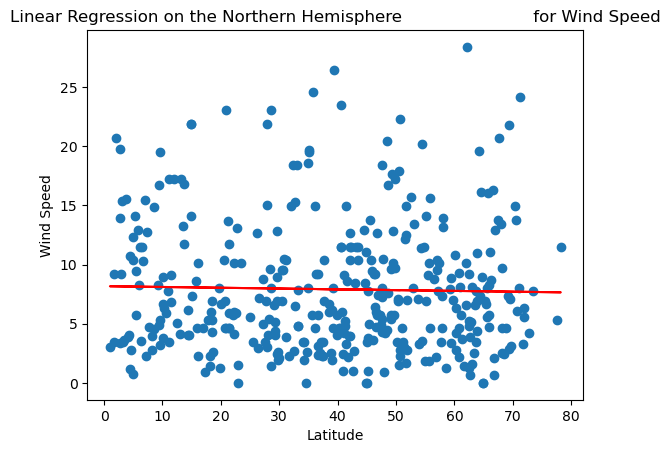

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

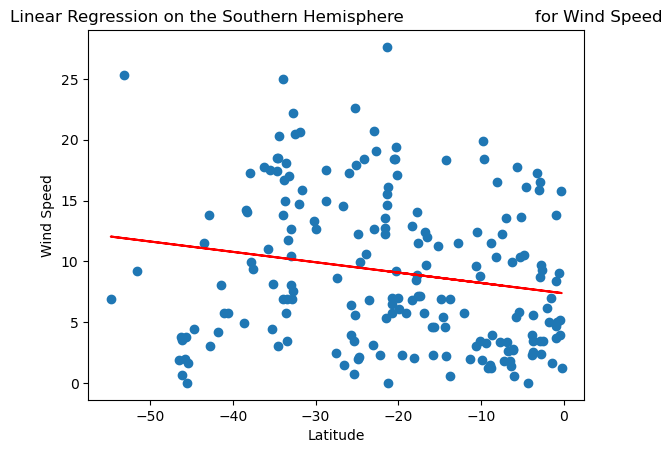

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))